# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [2]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

In [3]:
# Samples corresponding to the last digit of your roll number (plot a)
from numpy import linalg as LA
# from sklearn import preprocessing

np.set_printoptions(precision=5)

total_test_points = len(train_data)
my_digit = 3
my_digit_data = []
for ind in xrange(total_test_points):
    if(train_labels[ind] == my_digit):
        my_digit_data.append(train_data[ind])

my_cov = np.cov(my_digit_data,rowvar=False)
eig_vals ,eig_vecs = LA.eigh(my_cov)
max_val = np.amax(eig_vals)
norm_eig_vals = eig_vals / max_val

top = (norm_eig_vals[-100:])
# print(top)
plt.bar((np.arange(len(top))),(top))
plt.show()

NameError: name 'xrange' is not defined

In [4]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)
your_digit = (my_digit + 1) % 10
your_digit_data = []
for ind in xrange(total_test_points):
    if(train_labels[ind] == your_digit):
        your_digit_data.append(train_data[ind])

my_cov = np.cov(your_digit_data,rowvar=False)
eig_vals ,eig_vecs = LA.eigh(my_cov)
max_val = np.amax(eig_vals)
norm_eig_vals = eig_vals / max_val

top = (norm_eig_vals[-100:])
# print(top)
plt.bar((np.arange(len(top))),(top))
plt.show()

NameError: name 'xrange' is not defined

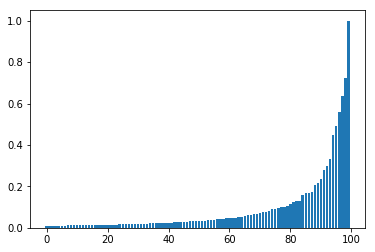

In [5]:
# All training data (plot c)
my_cov = np.cov(train_data,rowvar=False)
eig_vals ,eig_vecs = LA.eigh(my_cov)
# print(eig_vals)
max_val = np.amax(eig_vals)
norm_eig_vals = eig_vals / max_val

top = (norm_eig_vals[-100:])
# print(top)
plt.bar((np.arange(len(top))),(top))
plt.show()

In [6]:
# Randomly selected 50% of the training data (plot d)
from random import sample

rand_data = sample(train_data,3000)
my_cov = np.cov(rand_data,rowvar=False)
eig_vals ,eig_vecs = LA.eigh(my_cov)
max_val = np.amax(eig_vals)
norm_eig_vals = eig_vals / max_val

top = (norm_eig_vals[-100:])
# print(top)
plt.bar((np.arange(len(top))),(top))
plt.show()


TypeError: Population must be a sequence or set.  For dicts, use list(d).

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)

1. Plots a and b are not much different as only a single kind of distribution is there.

2. Plots b and c are quite different as c comprises of examples from multiple classes and thus having a wider spectrum.

3. Ranks
    a-5</br>
    b-5</br>
    c-15</br>
    d-15</br>

---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
Your answers here (double click to edit)

1. There can be 2^784 images possible.  1.017458e+236

2. Approximately 0 percent.

3. The eign values will be all large. Since there will be distribution along all the vectors.
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
Analytical answer here (double click to edit)

The eign values do not change since the matrix just rotates so the eign vectors change their orientation but the spread remains the same. </br>
An Orthonormal matrix preserves angles and length. </br>  

https://www.khanacademy.org/math/linear-algebra/alternate-bases/orthonormal-basis/v/lin-alg-orthogonal-matrices-preserve-angles-and-lengths). </br>

--- 

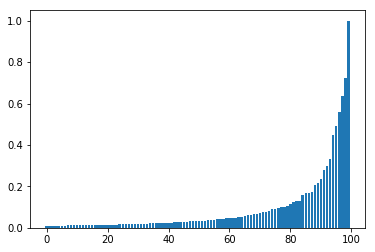

In [25]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

# code goes here
from scipy.stats import ortho_group

onm = ortho_group.rvs(dim = 784)

my_cov = np.cov(np.matmul(train_data,onm),rowvar=False)
eig_vals ,eig_vecs = LA.eigh(my_cov)
# print(eig_vals)
max_val = np.amax(eig_vals)
norm_eig_vals = eig_vals / max_val

top = (norm_eig_vals[-100:])
# print(top)
plt.bar((np.arange(len(top))),(top))
plt.show()


### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
Your answer here (double click to edit)

Then only the first 1 or 2 columns of the original matrix will be there in the final matrix. So there will be only 2 rows which will contain non-zero values in the co-variance matrix. Thus there will be 1-2 non zero eign values and rest will be zeroes.

---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

In [1]:
# Plotting code here
my_cov = np.cov(train_data,rowvar=False)
eig_vals ,eig_vecs = LA.eigh(my_cov)

idx = eig_vals.argsort()[::-1]   
eig_vals = eig_vals[idx]
eig_vecs = eig_vecs[:,idx]

vec1 = eig_vecs[:,0]
vec2 = eig_vecs[:,1]

x_cors = np.matmul(train_data,vec1)
y_cors = np.matmul(train_data,vec2)

plt.scatter(x_cors,y_cors)
plt.show()




NameError: name 'np' is not defined

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [8]:
# Print accuracy on the test set using MLE

In [9]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

In [10]:
# Print accuracy using Bayesian pairwise majority voting method

In [11]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

### 1.3.3 Question 4
Compare performances and salient observations

---
Your analysis here (double click to edit)

---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [9]:
# Your code here
# Print accuracies with K = 1, 3, 7

no_of_test_samples = test_data.shape[0]
no_of_dimensions = test_data.shape[1]
kone_ans = np.empty(no_of_test_samples)
kthree_ans = np.empty(no_of_test_samples)
kseven_ans = np.empty(no_of_test_samples)


for i in range(0,no_of_test_samples):
    row = test_data[i]
    
    diff_mat = np.square(train_data - row)
    diff_arr = np.sum(diff_mat,axis=1).tolist()
    diff_arr = np.asarray(diff_arr)
    diff_arr = np.sqrt(diff_arr)

    idx = diff_arr.argsort()[::1]   
    diff_arr = diff_arr[idx]
    sorted_labels = train_labels[idx]

    ## for k = 1.
    kone_ans[i] = sorted_labels[0]  
    
    ## for k=3
    dict3 = dict((cate,0) for cate in range(0,10))
    for ii in range(0,3):
        dict3[sorted_labels[ii]] = dict3[sorted_labels[ii]] + 1

    sorted_three = sorted(dict3,key=dict3.get,reverse=True)    
    kthree_ans[i] = int(sorted_three[0])
        
    ## for k=7
    dict7 = dict((cate,0) for cate in range(0,10))
    for ii in range(0,7):
        dict7[sorted_labels[ii]] = dict7[sorted_labels[ii]] + 1
    
    sorted_seven = sorted(dict7,key=dict7.get,reverse=True)    
    kseven_ans[i] = int(sorted_seven[0])  

## k = 1
count = 0
for ind in range(0,no_of_test_samples):
    
    if (kone_ans[ind] == test_labels[ind]):
        count = count + 1

# print(count)
accuracy_kone = (count/float(no_of_test_samples)) * 100
print("accuracy with k = 1 :",accuracy_kone)

## k = 3
count = 0
for ind in range(0,no_of_test_samples):
    
    if (kthree_ans[ind] == test_labels[ind]):
        count = count + 1

# print(count)
accuracy_kthree = (count/float(no_of_test_samples)) * 100
print("accuracy with k = 3 :",accuracy_kthree)


## k = 7
count = 0
for ind in range(0,no_of_test_samples):
    
    if (kseven_ans[ind] == test_labels[ind]):
        count = count + 1

# print(count)
accuracy_kseven = (count/float(no_of_test_samples)) * 100
print("accuracy with k = 7 :",accuracy_kseven)  
    
## Inbuilt Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

classifier = KNeighborsClassifier(n_neighbors=11)  
classifier.fit(train_data, train_labels)

y_pred = classifier.predict(test_data) 

print(classification_report(test_labels, y_pred))


                            

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       100
         1.0       0.80      1.00      0.89       100
         2.0       0.99      0.76      0.86       100
         3.0       0.93      0.92      0.92       100
         4.0       0.92      0.88      0.90       100
         5.0       0.96      0.93      0.94       100
         6.0       0.92      0.95      0.94       100
         7.0       0.88      0.91      0.89       100
         8.0       0.96      0.82      0.89       100
         9.0       0.85      0.92      0.88       100

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
Your analysis here (double click to edit)

1. The accuracies are not same since the class may vary as k increases/decreases.

2. K should not be very small otherwise there will be significant contribution of noise, also when k increases largely the computational overload increases and also there is a chance that model overfits. For identifying the best <b> K </b> , we split the training data into a validation set and traning set (8:2) ratio. Then test for different k values on the validation set and finally take that k , which provides the best accuracy.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [13]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Your algorithm here (double click to edit)

1. Firstly all the train and test labels will have to be assigned a neatness score. And each class will have a range
2. We take the test point and compute distances from all the points and sort it.
3. We now pick the k nearest neighbours.
4. Now we divide the label value of each of the knn by their corresponding distances to have a weighted distribution.
5. We sum up the values and find the label of the test sample.
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [17]:
# Your code here

train_labels_reg = train_labels / float(10)
test_labels_reg = test_labels / float(10)

no_of_test_samples = test_data.shape[0]
no_of_dimensions = test_data.shape[1]
k_ans = np.empty(no_of_test_samples)


for i in range(0,no_of_test_samples):
    row = test_data[i]
    
    ## distances are calulcated and sorted.
    diff_mat = np.square(train_data - row)
    diff_arr = np.sum(diff_mat,axis=1).tolist()
    diff_arr = np.asarray(diff_arr)
    diff_arr = np.sqrt(diff_arr)

    idx = diff_arr.argsort()[::1]   
    diff_arr = diff_arr[idx]
    sorted_labels = train_labels_reg[idx]

    ## for any k. compute the neatness of the sample.
    k = 3
    denom = diff_arr[k-1]
    neatness = 0
    for ii in range(0,k):
        diff_arr[ii] = diff_arr[ii] / float(denom)
        neatness = neatness + (sorted_labels[ii] / float(diff_arr[ii]))
        
    neatness = neatness / float(k)
    
    k_ans[i] = neatness

# print(k_ans)
error = 0
for i in range(0,no_of_test_samples):
    error = error + abs(k_ans[i] - test_labels_reg[i])


error = error / float(no_of_test_samples)

print("mean absolute error is:",error)



[0.71131 0.20752 0.10499 0.      0.58482 0.11839 0.59215 0.90797 0.50267
 1.00958 0.      0.6077  0.951   0.      0.10983 0.50827 0.75987 0.73685
 0.32079 0.42103 0.96218 0.64068 0.61602 0.5187  0.98472 0.      0.73737
 0.4103  0.      0.10538 0.31562 0.10448 0.30476 0.40809 0.77137 0.20419
 0.71204 0.1183  0.24129 0.10543 0.1087  0.73806 0.40819 0.10192 0.31663
 0.50735 0.10943 0.20987 0.40922 0.45418 0.60776 0.31417 0.53204 0.54625
 0.63009 0.      0.41442 0.12561 1.02858 0.52888 0.72649 0.40238 0.75967
 0.3254  0.70725 0.60034 0.70724 0.41005 0.33644 0.      0.7149  0.
 0.13694 0.83874 0.1137  0.71058 0.31415 0.57058 0.93498 0.73181 0.80013
 0.63336 0.2059  0.75116 0.84373 0.4081  0.71701 0.30337 0.63969 0.10221
 0.36941 0.61888 0.58369 0.30473 0.10726 0.41372 0.10738 0.73456 0.6442
 0.93192 0.63238 0.      0.51174 0.42848 0.90794 0.95101 0.20072 0.11327
 0.9077  0.6039  0.66818 0.36857 0.30915 0.98879 0.74623 0.91651 0.42521
 0.40814 0.9145  0.57336 0.52051 0.40889 0.73758 0.66007 

---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---